In [3]:
import pandas as pd
from sodapy import Socrata

# Create Socrata client (unauthenticated for public datasets)
client = Socrata("data.pa.gov", None)

# Fetch data (you can change the limit as needed; 2000 is default API page limit)
results = client.get("mcba-yywm", limit=50000)  # Adjust limit as needed

# Convert JSON results to pandas DataFrame
application_in = pd.DataFrame.from_records(results)

# Show basic info
print(application_in.head())
print(f"Total rows pulled: {len(application_in)}")

   countyname party              dateofbirth mailapplicationtype  \
0  SCHUYLKILL   NOP  1946-11-11T00:00:00.000              MAILIN   
1    DELAWARE     D  2002-07-25T00:00:00.000             OLMAILV   
2       BERKS     D  1998-10-04T00:00:00.000             OLMAILV   
3      BEAVER     D  1963-11-18T00:00:00.000             OLMAILV   
4     DAUPHIN     D  1963-01-11T00:00:00.000             OLMAILV   

              appissuedate            appreturndate           ballotsentdate  \
0  2020-08-27T00:00:00.000  2020-08-27T00:00:00.000  2020-08-27T00:00:00.000   
1  2020-09-01T00:00:00.000  2020-09-01T00:00:00.000  2020-10-03T00:00:00.000   
2  2020-04-15T00:00:00.000  2020-04-15T00:00:00.000  2020-10-07T00:00:00.000   
3  2020-08-05T00:00:00.000  2020-08-05T00:00:00.000  2020-09-24T00:00:00.000   
4  2020-04-10T00:00:00.000  2020-04-10T00:00:00.000  2020-10-05T00:00:00.000   

        ballotreturneddate                  legislative  \
0  2020-10-23T00:00:00.000   123RD LEGISLATIVE DIST

In [4]:
application_in.head()

,countyname,party,dateofbirth,mailapplicationtype,appissuedate,appreturndate,ballotsentdate,ballotreturneddate,legislative,senate,congressional
0,SCHUYLKILL,NOP,1946-11-11T00:00:00.000,MAILIN,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-10-23T00:00:00.000,123RD LEGISLATIVE DISTRICT,29TH SENATORIAL DISTRICT,9TH CONGRESSIONAL DISTRICT
1,DELAWARE,D,2002-07-25T00:00:00.000,OLMAILV,2020-09-01T00:00:00.000,2020-09-01T00:00:00.000,2020-10-03T00:00:00.000,2020-10-21T00:00:00.000,161ST LEGISLATIVE DISTRICT,26TH SENATORIAL DISTRICT,5TH CONGRESSIONAL DISTRICT
2,BERKS,D,1998-10-04T00:00:00.000,OLMAILV,2020-04-15T00:00:00.000,2020-04-15T00:00:00.000,2020-10-07T00:00:00.000,2020-10-21T00:00:00.000,129TH LEGISLATIVE DISTRICT,29TH SENATORIAL DISTRICT,9TH CONGRESSIONAL DISTRICT
3,BEAVER,D,1963-11-18T00:00:00.000,OLMAILV,2020-08-05T00:00:00.000,2020-08-05T00:00:00.000,2020-09-24T00:00:00.000,2020-10-19T00:00:00.000,15TH LEGISLATIVE DISTRICT,47TH SENATORIAL DISTRICT,17TH CONGRESSIONAL DISTRICT
4,DAUPHIN,D,1963-01-11T00:00:00.000,OLMAILV,2020-04-10T00:00:00.000,2020-04-10T00:00:00.000,2020-10-05T00:00:00.000,2020-10-19T00:00:00.000,106TH LEGISLATIVE DISTRICT,48TH SENATORIAL DISTRICT,10TH CONGRESSIONAL DISTRICT


In [5]:
# Extract rows with any nulls
invalid_data = application_in[application_in.isnull().any(axis=1)].copy()

# Keep only rows with no nulls
application_in = application_in.dropna()

In [6]:
# Optional: Check how many rows were dropped
print(f"Valid rows: {len(application_in)}, Invalid rows: {len(invalid_data)}")

Valid rows: 40861, Invalid rows: 9139


In [8]:
import re

def to_snake_case(value):
    if isinstance(value, str):
        return re.sub(r'\W+', '_', value.strip().lower())
    return value

application_in['senate'] = application_in['senate'].apply(to_snake_case)

In [9]:
application_in.head()

,countyname,party,dateofbirth,mailapplicationtype,appissuedate,appreturndate,ballotsentdate,ballotreturneddate,legislative,senate,congressional
0,SCHUYLKILL,NOP,1946-11-11T00:00:00.000,MAILIN,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-10-23T00:00:00.000,123RD LEGISLATIVE DISTRICT,29th_senatorial_district,9TH CONGRESSIONAL DISTRICT
1,DELAWARE,D,2002-07-25T00:00:00.000,OLMAILV,2020-09-01T00:00:00.000,2020-09-01T00:00:00.000,2020-10-03T00:00:00.000,2020-10-21T00:00:00.000,161ST LEGISLATIVE DISTRICT,26th_senatorial_district,5TH CONGRESSIONAL DISTRICT
2,BERKS,D,1998-10-04T00:00:00.000,OLMAILV,2020-04-15T00:00:00.000,2020-04-15T00:00:00.000,2020-10-07T00:00:00.000,2020-10-21T00:00:00.000,129TH LEGISLATIVE DISTRICT,29th_senatorial_district,9TH CONGRESSIONAL DISTRICT
3,BEAVER,D,1963-11-18T00:00:00.000,OLMAILV,2020-08-05T00:00:00.000,2020-08-05T00:00:00.000,2020-09-24T00:00:00.000,2020-10-19T00:00:00.000,15TH LEGISLATIVE DISTRICT,47th_senatorial_district,17TH CONGRESSIONAL DISTRICT
4,DAUPHIN,D,1963-01-11T00:00:00.000,OLMAILV,2020-04-10T00:00:00.000,2020-04-10T00:00:00.000,2020-10-05T00:00:00.000,2020-10-19T00:00:00.000,106TH LEGISLATIVE DISTRICT,48th_senatorial_district,10TH CONGRESSIONAL DISTRICT


In [10]:
# Convert dateofbirth to datetime and extract year
application_in['yr_born'] = pd.to_datetime(application_in['dateofbirth'], errors='coerce').dt.year.astype('Int64')

# Reorder columns: move 'yr_born' right after 'dateofbirth'
cols = list(application_in.columns)
dob_index = cols.index('dateofbirth')
# Remove 'yr_born' from the end and insert after 'dateofbirth'
cols.insert(dob_index + 1, cols.pop(cols.index('yr_born')))
application_in = application_in[cols]

In [11]:
application_in.head()

,countyname,party,dateofbirth,yr_born,mailapplicationtype,appissuedate,appreturndate,ballotsentdate,ballotreturneddate,legislative,senate,congressional
0,SCHUYLKILL,NOP,1946-11-11T00:00:00.000,1946,MAILIN,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-10-23T00:00:00.000,123RD LEGISLATIVE DISTRICT,29th_senatorial_district,9TH CONGRESSIONAL DISTRICT
1,DELAWARE,D,2002-07-25T00:00:00.000,2002,OLMAILV,2020-09-01T00:00:00.000,2020-09-01T00:00:00.000,2020-10-03T00:00:00.000,2020-10-21T00:00:00.000,161ST LEGISLATIVE DISTRICT,26th_senatorial_district,5TH CONGRESSIONAL DISTRICT
2,BERKS,D,1998-10-04T00:00:00.000,1998,OLMAILV,2020-04-15T00:00:00.000,2020-04-15T00:00:00.000,2020-10-07T00:00:00.000,2020-10-21T00:00:00.000,129TH LEGISLATIVE DISTRICT,29th_senatorial_district,9TH CONGRESSIONAL DISTRICT
3,BEAVER,D,1963-11-18T00:00:00.000,1963,OLMAILV,2020-08-05T00:00:00.000,2020-08-05T00:00:00.000,2020-09-24T00:00:00.000,2020-10-19T00:00:00.000,15TH LEGISLATIVE DISTRICT,47th_senatorial_district,17TH CONGRESSIONAL DISTRICT
4,DAUPHIN,D,1963-01-11T00:00:00.000,1963,OLMAILV,2020-04-10T00:00:00.000,2020-04-10T00:00:00.000,2020-10-05T00:00:00.000,2020-10-19T00:00:00.000,106TH LEGISLATIVE DISTRICT,48th_senatorial_district,10TH CONGRESSIONAL DISTRICT


In [12]:
application_in.describe()

,yr_born
count,40861.0
mean,1964.926311
std,19.293216
min,1800.0
25%,1950.0
50%,1962.0
75%,1981.0
max,2002.0


In [13]:
application_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40861 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   countyname           40861 non-null  object
 1   party                40861 non-null  object
 2   dateofbirth          40861 non-null  object
 3   yr_born              40861 non-null  Int64 
 4   mailapplicationtype  40861 non-null  object
 5   appissuedate         40861 non-null  object
 6   appreturndate        40861 non-null  object
 7   ballotsentdate       40861 non-null  object
 8   ballotreturneddate   40861 non-null  object
 9   legislative          40861 non-null  object
 10  senate               40861 non-null  object
 11  congressional        40861 non-null  object
dtypes: Int64(1), object(11)
memory usage: 4.1+ MB


In [ ]:
from datetime import datetime

# Ensure 'dateofbirth' is in datetime format
application_in['dateofbirth'] = pd.to_datetime(application_in['dateofbirth'], errors='coerce')

# Calculate age as of the 2020 Election Day (Nov 3, 2020)
election_day = datetime(2020, 11, 3)
application_in['age'] = (election_day.year - application_in['dateofbirth'].dt.year).astype('Int64')

# Group by party and calculate number of applicants, mean and median age
age_party_summary = application_in.groupby('party')['age'].agg(['count', 'mean', 'median']).sort_values(by='count', ascending=False)

# Show the result
print(age_party_summary)

       count       mean  median
party                          
D      26508   54.08439    57.0
R       9687  60.749355    63.0
NF      3261  46.205152    44.0
I        417  56.527578    59.0
NOP      316  61.841772    63.0
NO       268  58.958955    60.0
LN       127  41.338583    38.0
OTH      116  51.681034    54.5
NON       91  44.186813    41.0
GR        34  41.176471    39.5
INDE       7  37.571429    39.0
CT         3  68.666667    72.0
IND        2       46.0    46.0
AM         2       52.5    52.5
UNA        2       39.0    39.0
C          2       64.5    64.5
N          2       52.5    52.5
OP         1       55.0    55.0
S          1       37.0    37.0
RF         1       40.0    40.0
THPY       1       30.0    30.0
PO         1       84.0    84.0
UND        1       33.0    33.0
AD         1       73.0    73.0
NTS        1       58.0    58.0
NODE       1       73.0    73.0
M          1       83.0    83.0
LI         1       91.0    91.0
IT         1       79.0    79.0
FD      

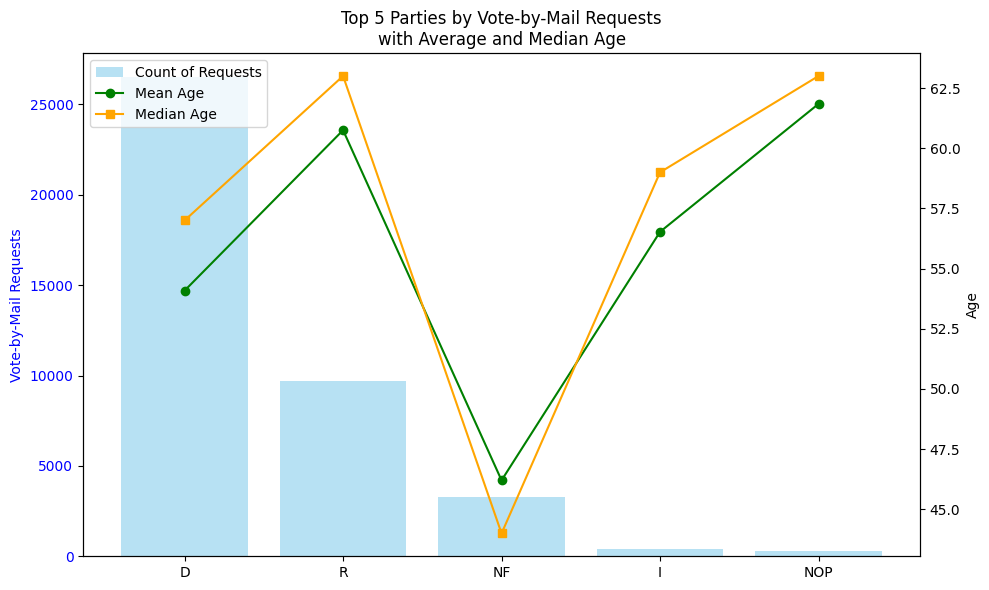

In [15]:
import matplotlib.pyplot as plt

# Group by party and calculate age statistics
top5 = application_in.groupby('party')['age'].agg(['count', 'mean', 'median']).sort_values(by='count', ascending=False).head(5)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for vote-by-mail request counts
ax1.bar(top5.index, top5['count'], alpha=0.6, label='Count of Requests', color='skyblue')
ax1.set_ylabel('Vote-by-Mail Requests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Top 5 Parties by Vote-by-Mail Requests\nwith Average and Median Age')

# Line chart for mean and median age
ax2 = ax1.twinx()
ax2.plot(top5.index, top5['mean'], marker='o', color='green', label='Mean Age')
ax2.plot(top5.index, top5['median'], marker='s', color='orange', label='Median Age')
ax2.set_ylabel('Age', color='black')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

## Key Observations:

1. **Democratic (D)** applicants made up the largest share of vote-by-mail requests (**26,508**), with a **mean age of ~54**.  
   • This suggests high engagement among middle-aged Democrats.

2. **Republican (R)** applicants had the second highest count (**9,687**), with a **higher average age (~61)** than Democrats.  
   • Suggests older Republican voters used mail voting, possibly due to health/safety concerns.

3. **Non-affiliated (NF)** voters had a substantial count (**3,261**) with a **younger average age (~46)**.  
   • Indicates younger independents were also engaging in vote-by-mail, possibly due to flexibility or accessibility.

4. Smaller parties (e.g., **Green (GR)**, **Libertarian (LN)**) show **lower volumes** and generally **younger median ages**, which may reflect smaller, younger voter bases.

In [19]:
# Ensure the date columns are parsed correctly
application_in['appissuedate'] = pd.to_datetime(application_in['appissuedate'], errors='coerce')
application_in['ballotreturneddate'] = pd.to_datetime(application_in['ballotreturneddate'], errors='coerce')

# Calculate latency in days
application_in['latency_days'] = (application_in['ballotreturneddate'] - application_in['appissuedate']).dt.days

# Compute median latency per legislative district
median_latency_by_legislative = application_in.groupby('legislative')['latency_days'].median().dropna().sort_values()

# Display result
print(median_latency_by_legislative.sort_index())

legislative
100TH LEGISLATIVE DISTRICT    48.0
101ST LEGISLATIVE DISTRICT    87.0
102ND LEGISLATIVE DISTRICT    87.0
103RD LEGISLATIVE DISTRICT    42.0
104TH LEGISLATIVE DISTRICT    51.0
                              ... 
96TH LEGISLATIVE DISTRICT     56.0
97TH LEGISLATIVE DISTRICT     69.0
98TH LEGISLATIVE DISTRICT     72.0
99TH LEGISLATIVE DISTRICT     42.0
9TH LEGISLATIVE DISTRICT      58.0
Name: latency_days, Length: 203, dtype: float64


In [17]:
application_in.head()

,countyname,party,dateofbirth,yr_born,mailapplicationtype,appissuedate,appreturndate,ballotsentdate,ballotreturneddate,legislative,senate,congressional,age,latency_days
0,SCHUYLKILL,NOP,1946-11-11,1946,MAILIN,2020-08-27,2020-08-27T00:00:00.000,2020-08-27T00:00:00.000,2020-10-23,123RD LEGISLATIVE DISTRICT,29th_senatorial_district,9TH CONGRESSIONAL DISTRICT,74,57
1,DELAWARE,D,2002-07-25,2002,OLMAILV,2020-09-01,2020-09-01T00:00:00.000,2020-10-03T00:00:00.000,2020-10-21,161ST LEGISLATIVE DISTRICT,26th_senatorial_district,5TH CONGRESSIONAL DISTRICT,18,50
2,BERKS,D,1998-10-04,1998,OLMAILV,2020-04-15,2020-04-15T00:00:00.000,2020-10-07T00:00:00.000,2020-10-21,129TH LEGISLATIVE DISTRICT,29th_senatorial_district,9TH CONGRESSIONAL DISTRICT,22,189
3,BEAVER,D,1963-11-18,1963,OLMAILV,2020-08-05,2020-08-05T00:00:00.000,2020-09-24T00:00:00.000,2020-10-19,15TH LEGISLATIVE DISTRICT,47th_senatorial_district,17TH CONGRESSIONAL DISTRICT,57,75
4,DAUPHIN,D,1963-01-11,1963,OLMAILV,2020-04-10,2020-04-10T00:00:00.000,2020-10-05T00:00:00.000,2020-10-19,106TH LEGISLATIVE DISTRICT,48th_senatorial_district,10TH CONGRESSIONAL DISTRICT,57,192


In [18]:
overall_median_latency = application_in['latency_days'].median()
print(f"Overall median latency: {overall_median_latency} days")

Overall median latency: 49.0 days


In [20]:
# Find the congressional district with the most ballot requests
top_congressional = application_in['congressional'].value_counts().idxmax()
top_congressional_count = application_in['congressional'].value_counts().max()

# Display result
print(f"The congressional district with the highest number of ballot requests is: {top_congressional}")
print(f"Total requests: {top_congressional_count}")

The congressional district with the highest number of ballot requests is: 1ST CONGRESSIONAL DISTRICT
Total requests: 3937
